# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("supermarket_sales.csv")

# ======================= 1. DATA CLEANING ==========================
# 1.1 Convert 'Date' column to datetime format
try:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
except Exception as e:
    print(f"Error converting Date column: {e}")

# 1.2 Extract 'Month' from the 'Date' column
try:
    data['Month'] = data['Date'].dt.month
except Exception as e:
    print(f"Error extracting Month column: {e}")

# 1.3 Validate and clean 'Time' column (must match HH:MM)
data = data[data['Time'].str.match(r'^\d{2}:\d{2}$', na=False)]

# Convert 'Time' column to datetime.time
try:
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.time
except Exception as e:
    print(f"Error converting Time column: {e}")

# 1.4 Extract 'Hour' from the 'Time' column
data['Hour'] = data['Time'].apply(lambda x: x.hour if pd.notnull(x) else np.nan)

# 1.5 Drop any unnecessary or duplicate rows
data.drop_duplicates(inplace=True)

# ======================= 2. FEATURE ENGINEERING ==========================
# 2.1 Add 'Revenue' column
try:
    data['Revenue'] = data['Unit price'] * data['Quantity']
except KeyError as e:
    print(f"Error calculating Revenue: {e}")

# 2.2 Create 'Day of Week' feature from the 'Date' column
data['Day_of_Week'] = data['Date'].dt.day_name()

# ======================= 3. OUTLIER DETECTION ==========================
# Check for outliers in 'Unit price', 'Quantity', and 'Revenue'
columns_to_check = ['Unit price', 'Quantity', 'Revenue']

for col in columns_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nOutliers for '{col}':")
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(outliers[[col]])

# ======================= 4. SAVE CLEANED DATA ==========================
# Save the cleaned dataset to a new CSV
output_file = "cleaned_supermarket_data.csv"
data.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved to {output_file}.")

# ======================= 5. DATA SUMMARY ==========================
print("\n--- Cleaned Data Overview ---")
print(data.head())
print("\nData Info:")
data.info()

print("\nStatistical Summary:")
print(data.describe())



Outliers for 'Unit price':
Empty DataFrame
Columns: [Unit price]
Index: []

Outliers for 'Quantity':
Empty DataFrame
Columns: [Quantity]
Index: []

Outliers for 'Revenue':
     Revenue
166    955.8
167    989.8
350    993.0
357    954.4
422    972.1
557    985.2
699    975.0
792    973.7
996    973.8

Cleaned dataset saved to cleaned_supermarket_data.csv.

--- Cleaned Data Overview ---
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.3

# **Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")


In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('cleaned_supermarket_data.csv')

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Dataset Preview:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

       Time      Payment    cogs  gross margin percentage  gross income  \
0  13:08:00      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00         Cash   76.40 

# **Univariate Analysis:**

# **Distribution of Numerical Features**

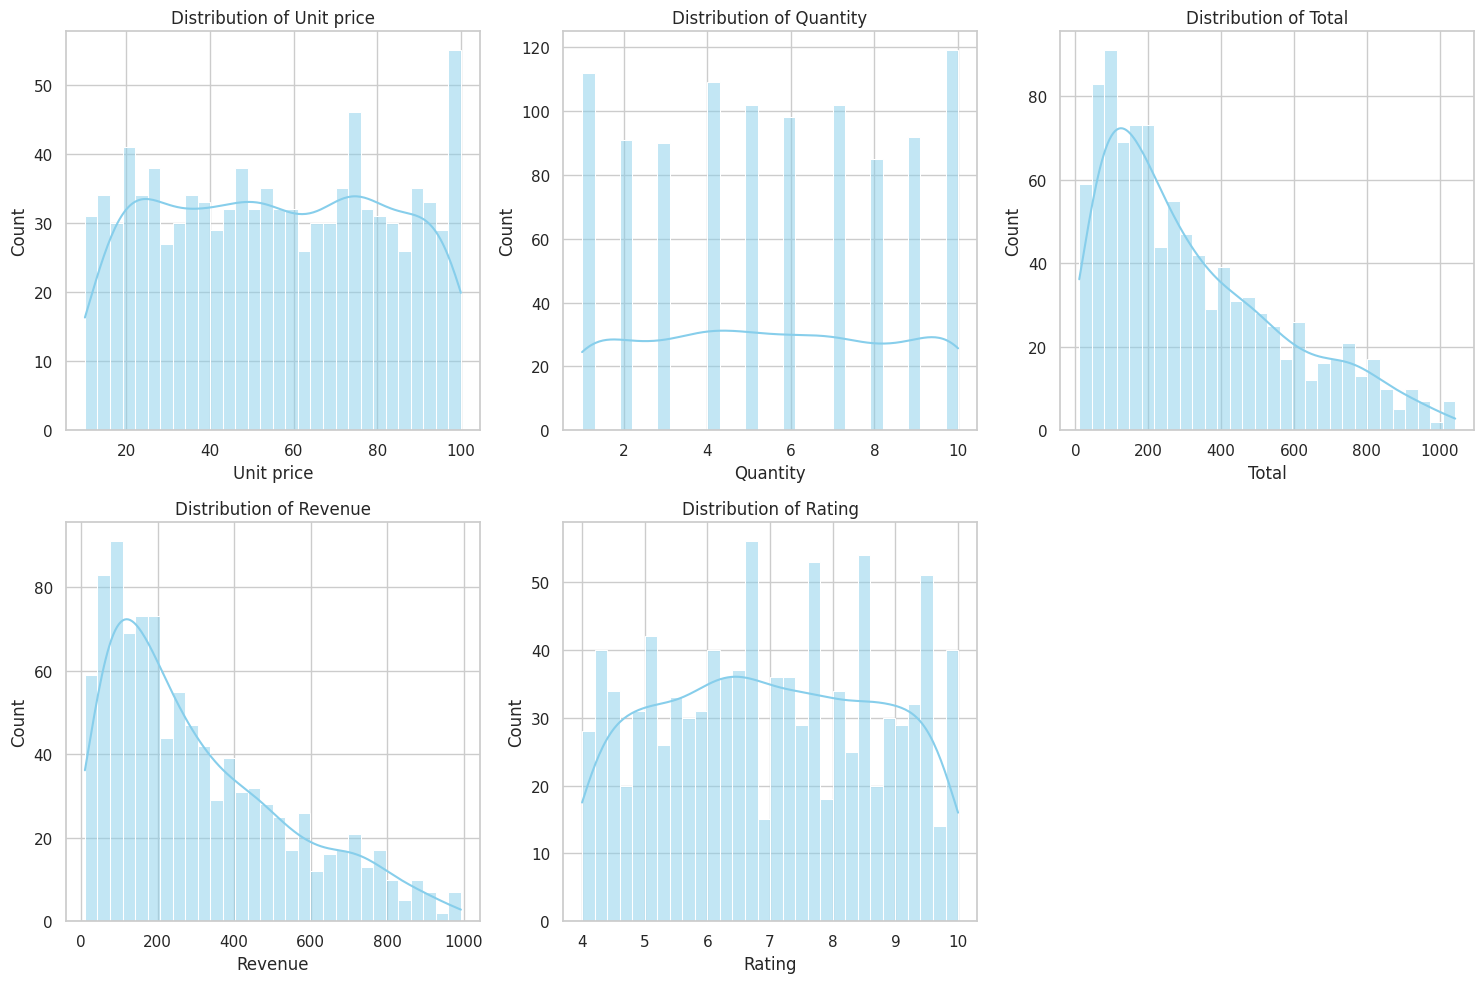

In [ ]:
# Plot histograms for numerical features
numerical_features = ['Unit price', 'Quantity', 'Total', 'Revenue', 'Rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# **Univariate Analysis:**
# **Count of Categorical Features**

<ipython-input-15-70feb2007a8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-15-70feb2007a8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-15-70feb2007a8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-15-70feb2007a8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

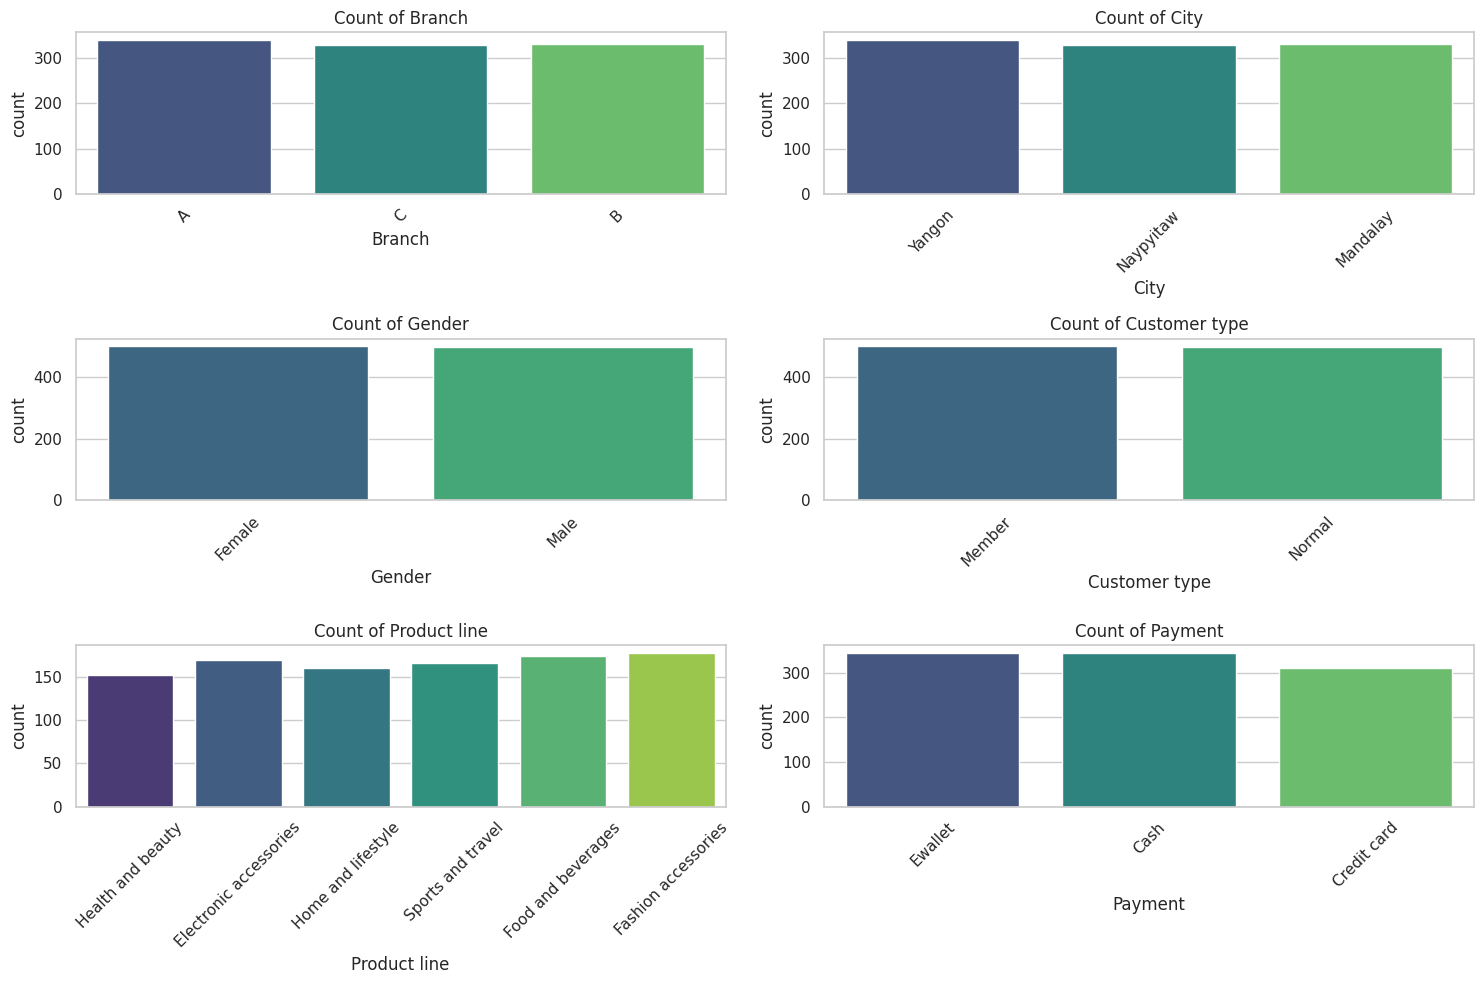

In [ ]:
categorical_features = ['Branch', 'City', 'Gender', 'Customer type', 'Product line', 'Payment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Bivariate Analysis**

**Relationship Between Revenue and Other Features**

<ipython-input-16-284b8aecc559>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Revenue', data=df, estimator=sum, palette='muted')
<ipython-input-16-284b8aecc559>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Revenue', data=df, estimator=sum, palette='coolwarm')
<ipython-input-16-284b8aecc559>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer type', y='Revenue', data=df, palette='Set2')


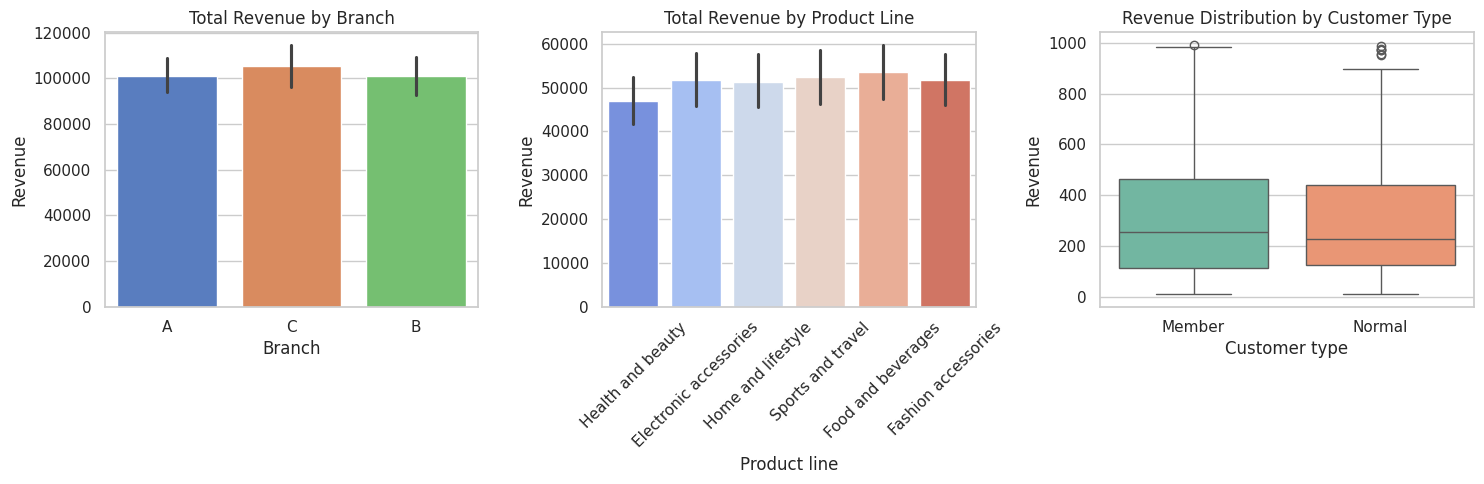

In [ ]:
plt.figure(figsize=(15, 5))

# Revenue by Branch
plt.subplot(1, 3, 1)
sns.barplot(x='Branch', y='Revenue', data=df, estimator=sum, palette='muted')
plt.title('Total Revenue by Branch')

# Revenue by Product Line
plt.subplot(1, 3, 2)
sns.barplot(x='Product line', y='Revenue', data=df, estimator=sum, palette='coolwarm')
plt.title('Total Revenue by Product Line')
plt.xticks(rotation=45)

# Revenue by Customer Type
plt.subplot(1, 3, 3)
sns.boxplot(x='Customer type', y='Revenue', data=df, palette='Set2')
plt.title('Revenue Distribution by Customer Type')

plt.tight_layout()
plt.show()


# **Correlation Heatmap**

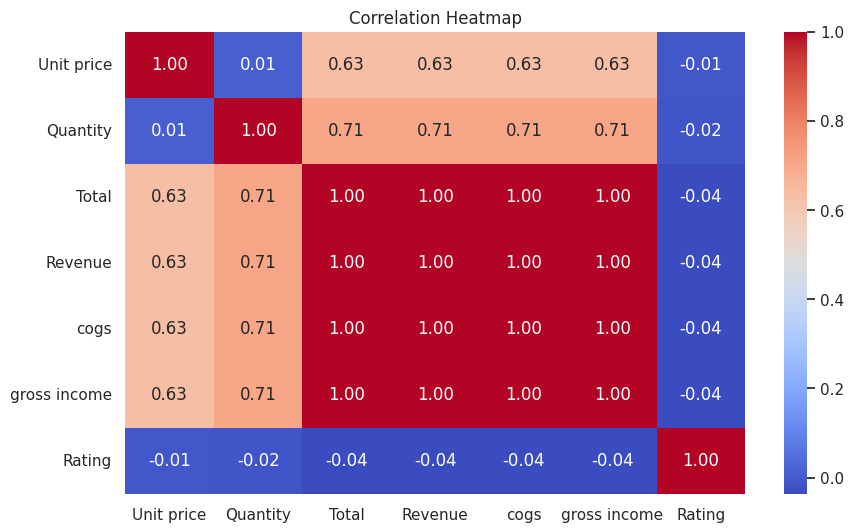

In [ ]:
# Correlation matrix
corr = df[['Unit price', 'Quantity', 'Total', 'Revenue', 'cogs', 'gross income', 'Rating']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# **Boxplots to Detect Outliers**

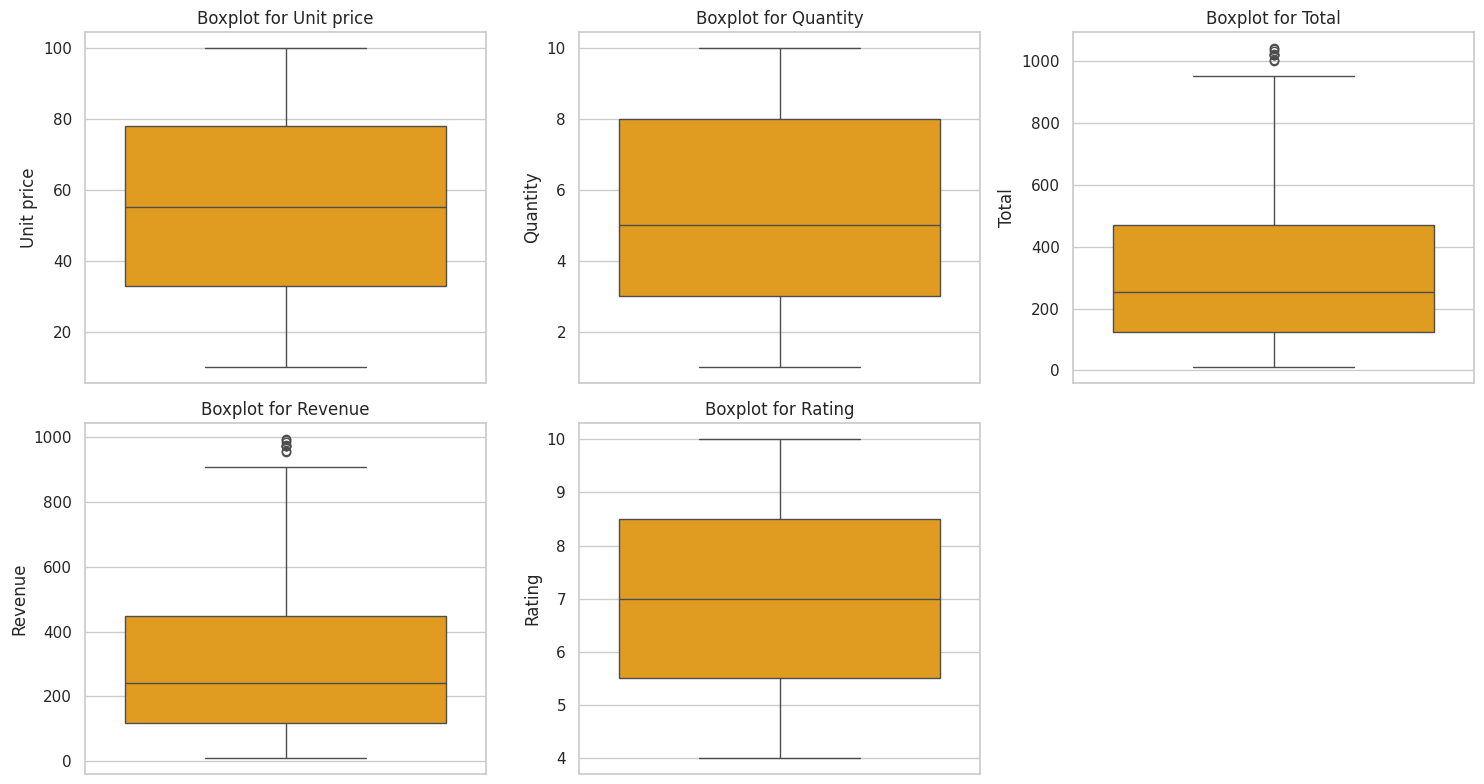

In [ ]:
# Boxplots for numerical variables
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()


# **Multivariate Analysis**

**Revenue and Gender Across Branches**

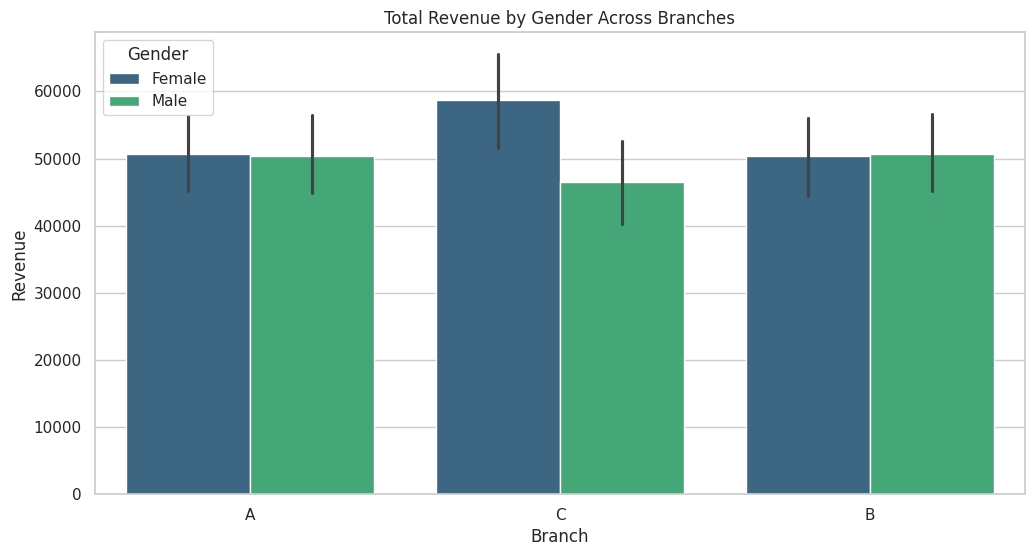

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Branch', y='Revenue', hue='Gender', estimator=sum, palette='viridis')
plt.title('Total Revenue by Gender Across Branches')
plt.show()


# **Sales Trend Over Time**

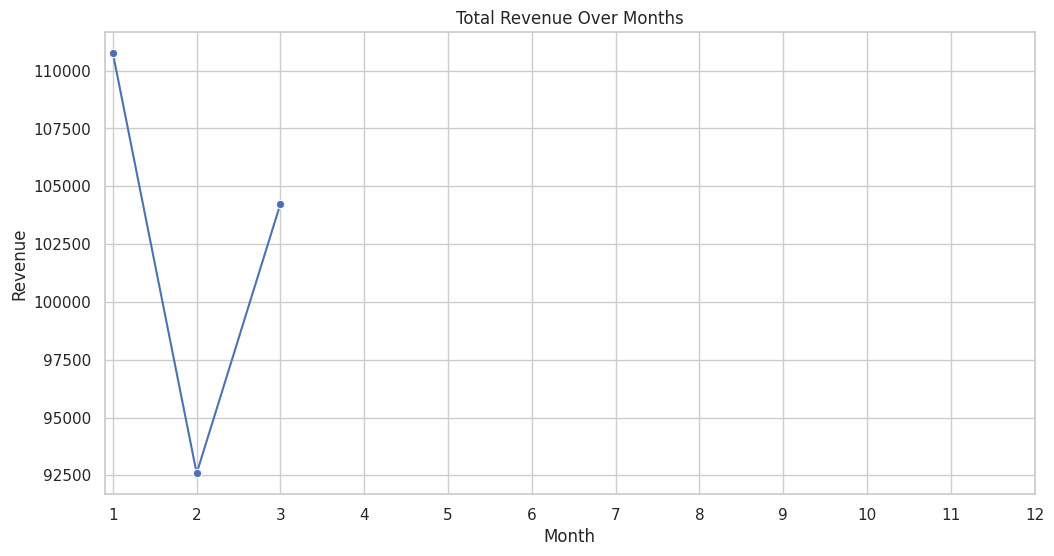

<ipython-input-20-74286c7c1f99>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Day_of_Week', y='Revenue', estimator=sum, palette='coolwarm')


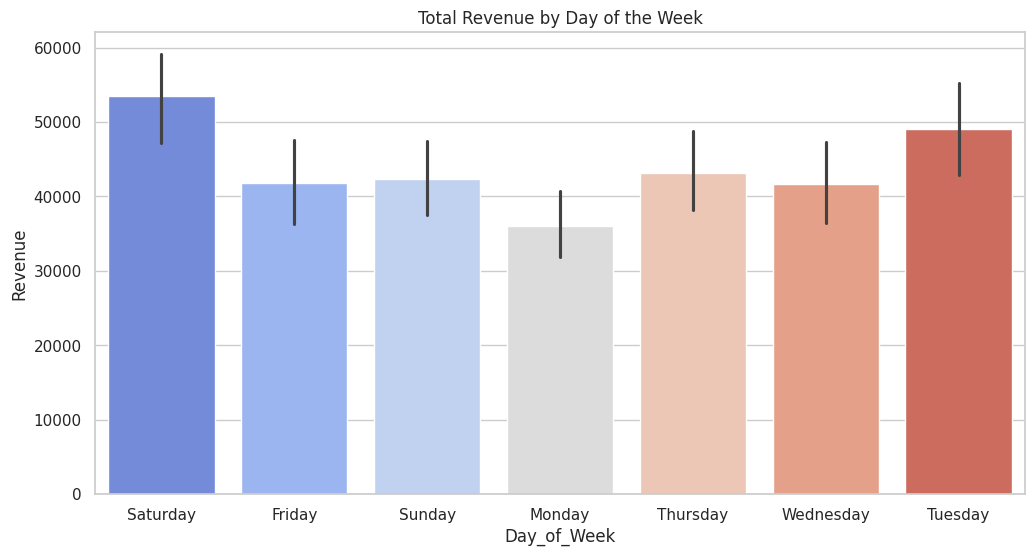

Unique values in 'Month' column:
[1 3 2]

Missing values in 'Month':
0


In [ ]:
# Revenue over Months
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Revenue', estimator=sum, errorbar=None, marker='o', color='b')
plt.title('Total Revenue Over Months')
plt.xticks(range(1, 13))
plt.show()

# Revenue by Day of the Week
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Day_of_Week', y='Revenue', estimator=sum, palette='coolwarm')
plt.title('Total Revenue by Day of the Week')
plt.show()

# Check unique values in the Month column
print("Unique values in 'Month' column:")
print(df['Month'].unique())

# Check for missing or invalid data
print("\nMissing values in 'Month':")
print(df['Month'].isnull().sum())

# Convert 'Month' to numeric if needed
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

# Drop or handle rows where 'Month' is invalid
df = df.dropna(subset=['Month'])

# Ensure 'Month' is integer
df['Month'] = df['Month'].astype(int)


**Peak shopping hours (Time in dataset), best-selling items (Product line in dataset), and customer preferences (Customer in dataset).**


--- Peak Shopping Hours ---
Hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: count, dtype: int64


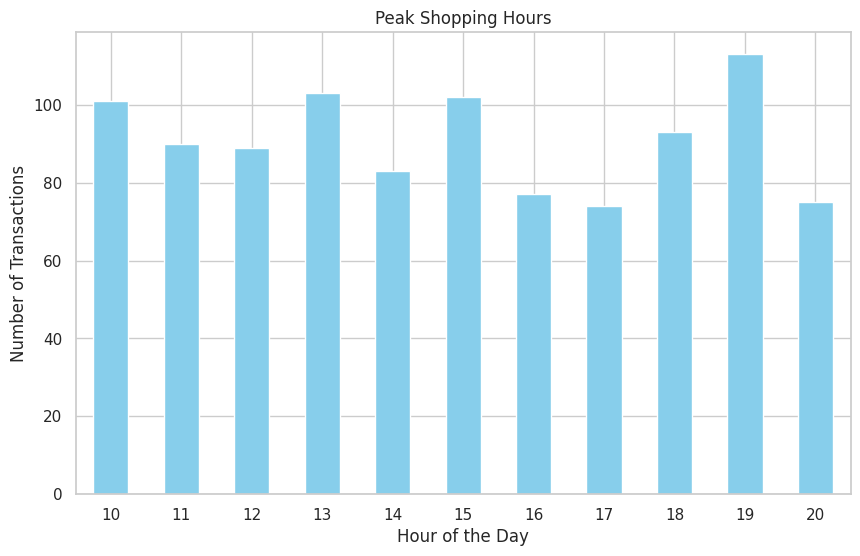


--- Best-Selling Items (Revenue) ---
Product line
Food and beverages        53471.28
Sports and travel         52497.93
Electronic accessories    51750.03
Fashion accessories       51719.90
Home and lifestyle        51297.06
Health and beauty         46851.18
Name: Revenue, dtype: float64


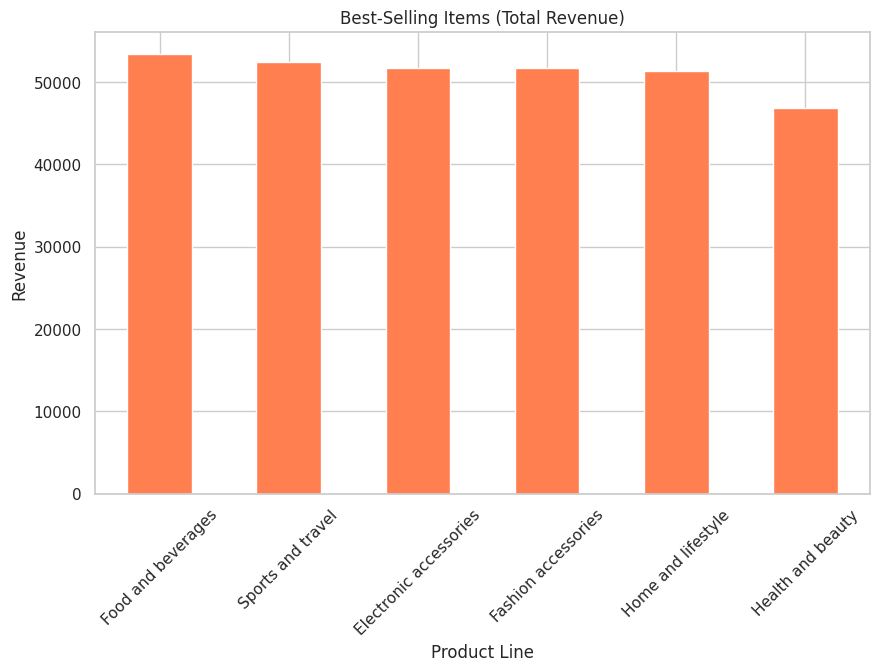


--- Customer Preferences (Revenue by Customer Type) ---
Customer type
Member    156403.28
Normal    151184.10
Name: Revenue, dtype: float64


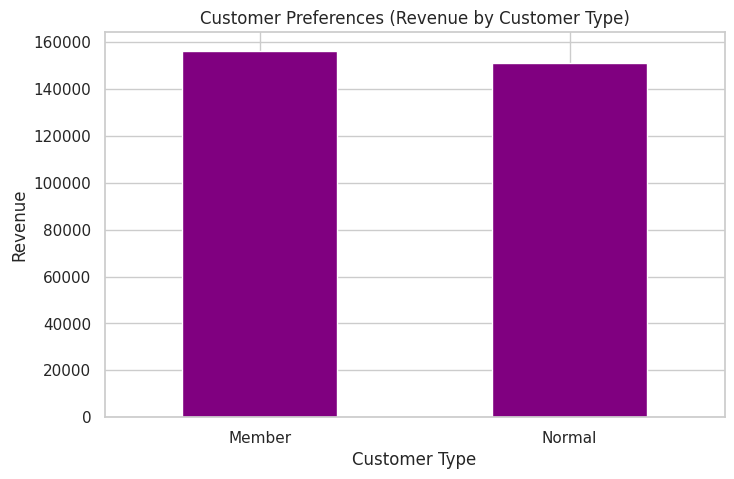

In [ ]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv("cleaned_supermarket_data.csv")

# ======================= Peak Shopping Hours ==========================
# Group by 'Hour' to find total transactions in each hour
peak_hours = data['Hour'].value_counts().sort_index()
print("\n--- Peak Shopping Hours ---")
print(peak_hours)

# Plot Peak Shopping Hours
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar', color='skyblue')
plt.title('Peak Shopping Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

# ======================= Best-Selling Items ==========================
# Group by 'Product line' to find total sales per product line
best_selling_items = data.groupby('Product line')['Revenue'].sum().sort_values(ascending=False)
print("\n--- Best-Selling Items (Revenue) ---")
print(best_selling_items)

# Plot Best-Selling Items
plt.figure(figsize=(10, 6))
best_selling_items.plot(kind='bar', color='coral')
plt.title('Best-Selling Items (Total Revenue)')
plt.xlabel('Product Line')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# ======================= Customer Preferences ==========================
# Group by 'Customer type' to see the total revenue generated by each customer type
customer_preferences = data.groupby('Customer type')['Revenue'].sum().sort_values(ascending=False)
print("\n--- Customer Preferences (Revenue by Customer Type) ---")
print(customer_preferences)

# Plot Customer Preferences
plt.figure(figsize=(8, 5))
customer_preferences.plot(kind='bar', color='purple')
plt.title('Customer Preferences (Revenue by Customer Type)')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()



--- Transaction Counts by Gender ---
Gender
Female    501
Male      499
Name: count, dtype: int64


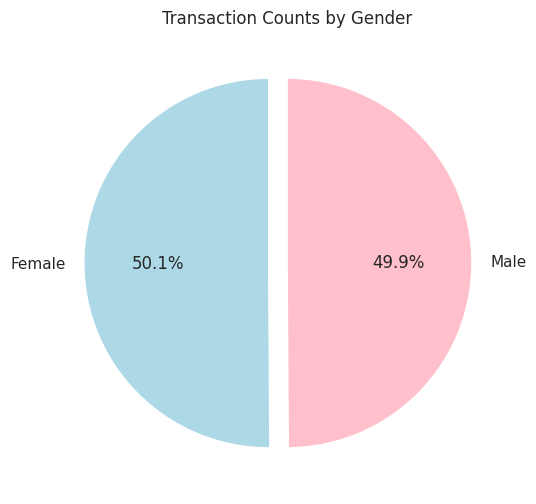

In [ ]:
# ======================= Gender Counts ==========================
# Count the number of transactions for each gender
gender_counts = data['Gender'].value_counts()
print("\n--- Transaction Counts by Gender ---")
print(gender_counts)

# Plot Gender Counts
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90, explode=[0.1, 0])
plt.title('Transaction Counts by Gender')
plt.ylabel('')  # Remove default y-axis label
plt.show()
